# Máquinas Térmicas
 _Prof. Tito Dias Júnior_

### Ciclo de Rankine Ideal com Reaquecimento


### **Exemplo:**
Considere uma usina a vapor que opera segundo o ciclo de Rankine ideal com reaquecimento.
O vapor entra na turbina de alta pressão a 15 MPa e 600 °C e é condensado
no condensador a uma pressão de 10 kPa. Considerando que o conteúdo
de umidade do vapor na saída da turbina de baixa pressão não deve exceder 10,4%,
determine:

(a) a pressão na qual o vapor deve ser reaquecido e 

(b) a eficiência térmica do ciclo. 

Considere que o vapor é reaquecido até a mesma temperatura de entrada da turbina de alta pressão.

![Esquema](Exemplo_10.4.png "Ciclo de Rankine com Reaquecimento")

## Solução

Para a solução do problema devemos analisar o diagrama T-s para o ciclo ideal de Rankine e, partindo da definição, calcular a eficiência térmica do ciclo e determinar a pressão na qual o vapor deve ser reaquicido, considerando 

Podemos construir o diagrama abaixo, desprezando as perdas de carga no evaporador e condensador, considerando a bomba e a turbina isentrópicas e o ciclo operando em regime permanente.

![Diagrama](Diagrama_10.4.png "Diagrama T-s para o Ciclo de Rankine com Reaquecimento")

Começamos obtendo as propriedades do fluido de trabalho (Água) nos estados de interesse. Para isso vamos usar a biblioteca de propriedades de fluidos CoolProp (http://www.coolprop.org) e definir a água (water) como fluido de trabalho.

In [4]:
from CoolProp import CoolProp as cp
fluido = 'Water'

Para o estado 1, temos líquido saturado a $P_1=10kPa = 0,010MPa$:


In [5]:
P1 = 0.010 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
Q1 = 0    # Título igual a zero para líquido saturado
h1 = cp.PropsSI('H', 'P', P1 * 1E6, 'Q', Q1, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
v1 = 1/cp.PropsSI('D', 'P', P1 * 1E6, 'Q', Q1, fluido)  #Determinando a densidade e invertendo para obter o volume específico (m^3/kg)
s1 = cp.PropsSI('S', 'P', P1 * 1E6, 'Q', Q1, fluido) * 1E-3 #Determinando a entropia e convertendo para kJ/kg
T1 = cp.PropsSI('T', 'P', P1 * 1E6, 'Q', Q1, fluido)        #Determinando a temperatura em K
print('h1= {:.3f} kJ/kg'.format(h1))
print('v1= {:.3f} kJ/kg'.format(v1))
print('s1= {:.3f} kJ/kg'.format(s1))
print('T1= {:.3f} °C'.format(T1-273.15))

h1= 191.806 kJ/kg
v1= 0.001 kJ/kg
s1= 0.649 kJ/kg
T1= 45.806 °C


Para o estado 2, temos líquido comprimido a $P_2=15,0MPa$ e $s_2=s_1$ (bomba isentrópica):


In [6]:
P2 = 15 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
s2 = s1    # Título igual a um para vapor saturado
h2 = cp.PropsSI('H', 'P', P2 * 1E6, 'S', s2*1E3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
T2 = cp.PropsSI('T', 'P', P2 * 1E6, 'S', s2*1E3, fluido) #Determinando a temperatura em K
print('h2= {:.3f} kJ/kg'.format(h2))
print('T2= {:.3f} °C'.format(T2-273.15))

h2= 206.902 kJ/kg
T2= 46.305 °C


Do diagrama T-s, observamos que no estado 3 temos vapor superaquecido a $P_3=15,0MPa$ e $T_3=600°C$:


In [7]:
P3=P2 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
T3=600 + 273.15   # Temperatura em °C, a conversão para K será feita na chamada à função abaixo.
h3 = cp.PropsSI('H', 'P', P3 * 1E6, 'T', T3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
s3 = cp.PropsSI('S', 'P', P3 * 1E6, 'T', T3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
print('h3= {:.3f} kJ/kg'.format(h3))
print('T3= {:.3f} °C'.format(T3-273.15))

h3= 3583.132 kJ/kg
T3= 600.000 °C


No Estado 4 teremos $P_4 = 4MPa$ e $s_3=s_4$ e, para determinar a entalpia:


In [12]:
s4 = s3 #Turbina isentrópica
P4 = 4 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
h4 = cp.PropsSI('H', 'S', s4 * 1E3, 'P', P4*1E6, fluido)*1e-3
T4 = cp.PropsSI('T', 'S', s4 * 1E3, 'P', P4*1E6, fluido)  #Determinando a entalpia e convertendo para kJ/kg
print('h4= {:.3f} kJ/kg'.format(h4))
print('s4= {:.3f} kJ/kg'.format(s4))
print('T4= {:.3f} °C'.format(T4-273.15))

h4= 3153.875 kJ/kg
s4= 6.680 kJ/kg
T4= 374.657 °C


No Estado 6, a umidade no vapor não deve exceder 10,4%, portanto o título deve ser no mínimo $Q_6=0,894$ para uma pressão de saturação $P_6=10kPa$ e podemos determinar a entalpia e entropia:

In [19]:
P6 = 0.010 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
Q6 = 0.894    # Título especificado
h6 = cp.PropsSI('H', 'P', P6 * 1E6, 'Q', Q6, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
v6 = 1/cp.PropsSI('D', 'P', P6 * 1E6, 'Q', Q6, fluido)  #Determinando a densidade e invertendo para obter o volume específico (m^3/kg)
s6 = cp.PropsSI('S', 'P', P6 * 1E6, 'Q', Q6, fluido) * 1E-3 #Determinando a entropia e convertendo para kJ/kg
T6 = cp.PropsSI('T', 'P', P6 * 1E6, 'Q', Q6, fluido)        #Determinando a temperatura em K
print('h6= {:.3f} kJ/kg'.format(h6))
print('v6= {:.3f} kJ/kg'.format(v6))
print('s6= {:.3f} kJ/kg'.format(s6))
print('T6= {:.3f} °C'.format(T6-273.15))

h6= 2330.301 kJ/kg
v6= 13.115 kJ/kg
s6= 7.354 kJ/kg
T6= 45.806 °C


No Estado 5 teremos $T_5 = 600°C$ e $s_5=s_6$ e, para determinar a entalpia:


In [20]:
s5 = s6 #Turbina isentrópica
T5 = 600 + 273.15 #Unidade em K
h5 = cp.PropsSI('H', 'S', s5 * 1E3, 'T', T5, fluido)*1e-3
print('h5= {:.3f} kJ/kg'.format(h5))

h5= 3673.760 kJ/kg


Do diagrama T-s, observamos que a pressão de reaquecimento corresponde a $P_5$:


In [24]:
P5 = cp.PropsSI('P', 'S', s5 * 1E3, 'T', T5, fluido) * 1e-6
print('P5 = {:.3f} MPa:'.format(P5))

P5 = 4.138 MPa:


Para calcular a eficiência térmica podemos utilizar a fórmula $\eta=1-\frac{q_{sai}}{q_{ent}}$, e $q_{sai}=h_6-h_1$ e $q_{ent}=(h_3-h_2)+(h_5-h_4)$: 

In [26]:
Q_sai = (h6-h1)
Q_ent = (h3-h2)+(h5-h4)
eta = 1-Q_sai/Q_ent
print('Q_sai= {:.3f} kJ/kg'.format(Q_sai))
print('Q_ent= {:.3f} kJ/kg'.format(Q_ent))
print('Eficiência = {:.3f} '.format(eta))

Q_sai= 2138.495 kJ/kg
Q_ent= 3896.115 kJ/kg
Eficiência = 0.451 


## Diagrama T-s - Ciclo de Rankine

#### Processos termodinâmicos considerados:

- Processo 1 a 2 : Compressão isentrópica   (s2 = s1); <br> 
- Processo 2 a 3 : Aquecimento isobárico    (P3 = P2); <br>
- Processo 3 a 4 : Expansão isentrópica     (s4 = s3); <br>
- Processo 4 a 5 : Aquecimento isobárico    (P4 = P5); <br>
- Processo 5 a 6 : Expansão isentrópica     (s5 = s6); <br>
- Processo 6 a 1 : Resfriamento isobárico   (P6 = P1).

Para plotar o Diagrama T-s, precisamos utilizar a biblioteca matplotlib para mostrar o gráfico e a biblioteca numpy para poder gerar os vetores que serão plotados.

Construindo o diagrama T - s:

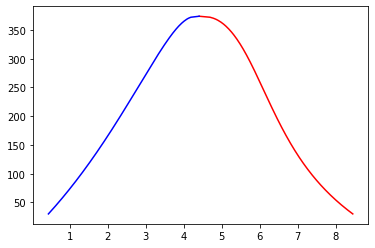

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure() # Define a saída do gráfico

## Curvas de saturação de líquido (Q=0) e vapor (Q=1) para temperatura variando entre 10°C e 647.096K (T crítica)
npt = np.linspace(30,647.096-273.15,200) # Gera um vetor com 200 elementos para o intervalo de temperatura 
svap = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 1, fluido) * 1E-3 for j in npt]]
sliq = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 0, fluido) * 1E-3 for j in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

### Conjunto de processos  (s,T)

T12 = [T1-273.15, T2-273.15] 
s12 = [s1, s2]

T23=np.linspace(T2-273.15,T3-273.15,100)
s23 = [s for s in [cp.PropsSI('S', 'T', j+273.15 , 'P', P3*1E6, fluido) * 1E-3 for j in T23]]

T34 = [T3-273.15, T4-273.15]
s34 = [s3, s4]

T45 = np.linspace(T4-273.15,T5-273.15,100)
s45 = [s for s in [cp.PropsSI('S', 'T', j+273.15 , 'P', P5*1E6, fluido) * 1E-3 for j in T45]]

T56 = [T5-273.15, T6-273.15]
s56 = [s5, s6]

T61 = [T6-273.15, T1-273.15]
s61 = [s6,s1]

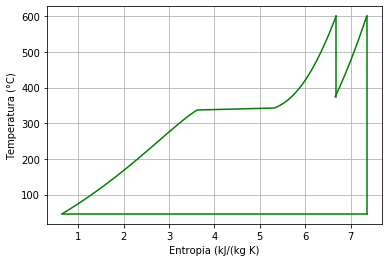

In [34]:
plt.plot(s12,T12,'g')
plt.plot(s23,T23,'g')
plt.plot(s34,T34,'g')
plt.plot(s45,T45,'g')
plt.plot(s56,T56,'g')
plt.plot(s61,T61,'g')


plt.xlabel('Entropia (kJ/(kg K)')
plt.ylabel('Temperatura (°C)')
plt.savefig('Rankine.png', transparent = True)
plt.grid()
plt.show()

In [35]:
from bokeh.plotting import *

# Criando um arquivo estático em html
output_file("Rankine_Reaquecimento.html")

output_notebook()

p = figure(plot_width=600, plot_height=600)

p.title.text = 'Ciclo Ideal de Rankine com Reaquecimento'
p.title.align = 'center'
p.title.text_color = 'black'
p.title.text_font_size = '30px'
p.xaxis[0].axis_label = 'Entropia (kJ/(kg K)'
p.yaxis[0].axis_label = 'Temperatura (°C)'


p.line(sliq, npt, legend_label = 'Curva de Líquido Saturado', line_width = 2, color = 'blue')
p.line(svap, npt, legend_label = 'Curva de Vapor Saturado', line_width = 2, color = 'red')

Loading BokehJS ...

GlyphRenderer(id='4474', ...)

In [36]:
p.line(s12, T12, line_width = 2, color = 'green')
p.line(s23, T23, line_width = 2, color = 'green')
p.line(s34, T34, line_width = 2, color = 'green')
p.line(s45, T45, line_width = 2, color = 'green')
p.line(s56, T56, line_width = 2, color = 'green')
p.line(s61, T61, line_width = 2, color = 'green')
p.legend.location = "top_left"

# Exibir o Gráfico
show(p)

### Exercício
Utilizando este Notebook, simule o mesmo ciclo considerando que a umidade do vapor na saída da caldeira não ultrapasse 5%. Em relação ao exemplo, essa mudança na especificação do título aumenta ou diminui a eficiência do ciclo? Justifique.